In [1]:
from import_db_from_file import write_database
from add_uncertainties import add_uncertainties
from LCA_calculations import get_LCA_scores, get_MCLCA_scores
import visualisation as vis
#from make_process_diagram import make_process_diagram

import bw2data as bd
import bw2io as bi
import bw2calc as bc
import os
import shutil

In [2]:
bd.projects.set_current('cLCA-aalborg')

remove = True
if remove == True and os.path.exists('results'):
    shutil.rmtree('results')


models = ["corn"] 
models += ['bread']

for model in models:
    write_database(model)
    add_uncertainties(model)

bd.databases


 Writing database for: corn

Deleted old database fg_corn

****** Writing new database: fg_corn
Not able to determine geocollections for all datasets. This database is not ready for regionalization.
Title: Writing activities to SQLite3 database:
  Started: 05/18/2023 23:10:11
  Finished: 05/18/2023 23:10:11
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.28
{'depends': ['biosphere3', 'con391'], 'backend': 'sqlite', 'number': 8, 'modified': '2023-05-18T23:10:11.151088', 'geocollections': [], 'searchable': True, 'processed': '2023-05-18T23:10:11.258010', 'dirty': False}

 Writing database for: bread

Deleted old database fg_bread

****** Writing new database: fg_bread
Not able to determine geocollections for all datasets. This database is not ready for regionalization.
Title: Writing activities to SQLite3 database:
  Started: 05/18/2023 23:10:11
  Finished: 05/18/2023 23:10:11
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.29
{'depends': ['biosphere3', 'con391'], 

Databases dictionary with 4 object(s):
	biosphere3
	con391
	fg_bread
	fg_corn


***************** LCA calculations *****************

The functional unit is: 
Succinic acid production (corn), with an amount of 1 kg

*****
The exchanges of the functional unit are: 

Exchange: 1.0 kg 'Succinic acid production (corn)' (kg, None, None) to 'Succinic acid production (corn)' (kg, None, None)>
Exchange: -2.72 kilogram 'market for ammonium sulfate' (kilogram, RER, None) to 'Succinic acid production (corn)' (kg, None, None)>
Exchange: 1.66 kg 'Sorghum grains' (kg, None, None) to 'Succinic acid production (corn)' (kg, None, None)>
Exchange: 0.013 kg 'Dextrose' (kg, None, None) to 'Succinic acid production (corn)' (kg, None, None)>
Exchange: 1.29 kg 'process water' (kg, None, None) to 'Succinic acid production (corn)' (kg, None, None)>
Exchange: 25.3 m3 'Ultrapure water' (m3, None, None) to 'Succinic acid production (corn)' (kg, None, None)>
Exchange: 2.67 kWh 'Electricity' (kWh, None, None) to 'Succinic acid production (corn)' (kg, None, None)>
Exchange: 14.77 mj 'Natural g

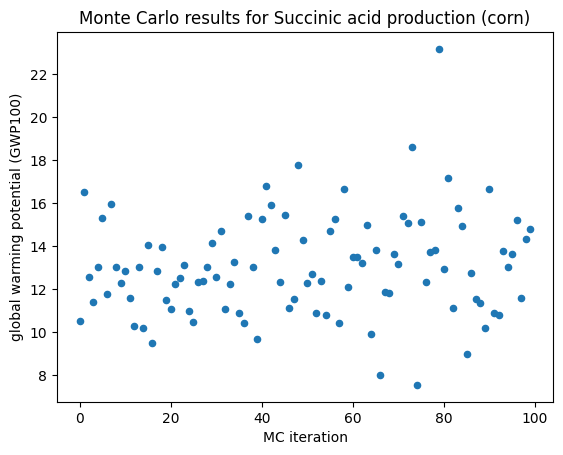

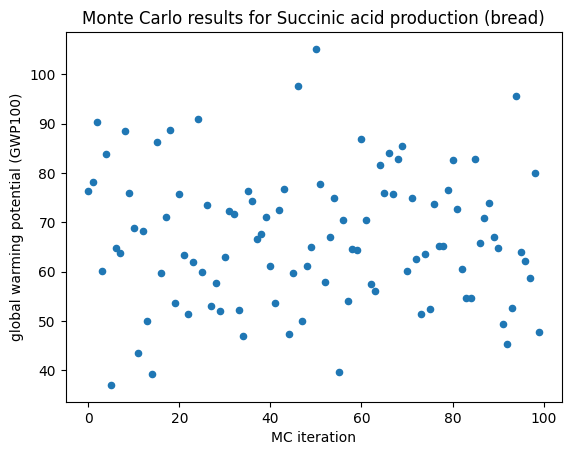

In [3]:
for model in models:
    get_LCA_scores(model)
    get_MCLCA_scores(model, iterations=100)
    # make_process_diagram(model)

/home/stew/code/gh/cLCA-Aalborg/visualisation.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label=col.split('@')[0])
/home/stew/code/gh/cLCA-Aalborg/visualisation.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label=col.split('@')[0])


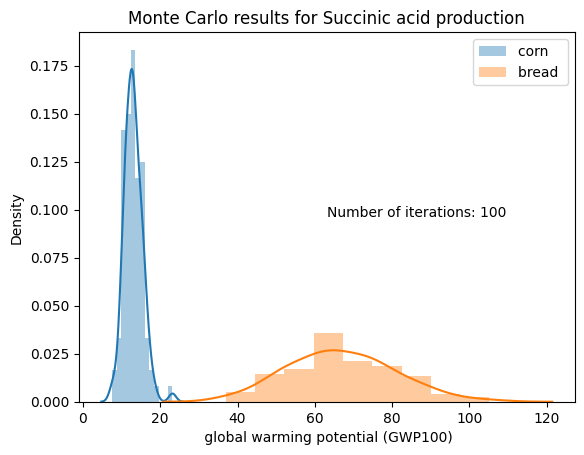

<Figure size 640x480 with 0 Axes>

In [4]:
vis.plot_MC_results()

In [5]:
from import_db_from_file import write_database
from add_uncertainties import add_uncertainties
from LCA_calculations import get_LCA_scores, get_MCLCA_scores
import visualisation as vis
#from make_process_diagram import make_process_diagram

import bw2data as bd
import bw2io as bi
import bw2calc as bc
import os
import shutil

/home/stew/code/gh/cLCA-Aalborg/visualisation.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label=col.split('@')[0])
/home/stew/code/gh/cLCA-Aalborg/visualisation.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label=col.split('@')[0])


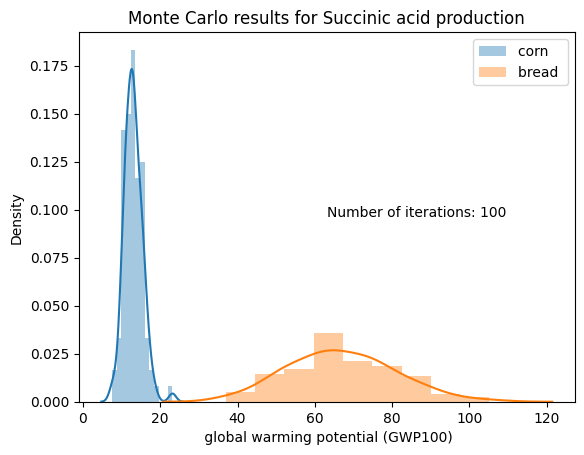

<Figure size 640x480 with 0 Axes>

In [6]:
vis.plot_MC_results()

In [7]:
# Read the CSV file into a DataFrame
def plot_MC_results():
    df = pd.read_csv('results/MC_LCA_results.csv')


    # Create a distplot of the two Series objects
    for col in df.columns:
        sns.distplot(df[col], 
        label=col.split('@')[0],
        mean = df[col].mean(),
        std = df[col].std(),)
        plt.text(mean, 0.05, f'Mean: {mean:.2f}\nStd: {std:.2f}', ha='center', va='center',     color='red', fontsize=10)

    # Add a legend to the plot
    plt.legend()
    plt.xlabel(col.split('@')[1])
    plt.title('Monte Carlo results for Succinic acid production')
    plt.annotate("Number of iterations: {}".format(len(df)), xy=(0.5, 0.5), xycoords='axes fraction')
    # Show the plot
    plt.show()

    # Save the plot
    plt.savefig('figures/MC_LCA_results_distplot.svg')

In [8]:
vis.plot_MC_results()

TypeError: distplot() got an unexpected keyword argument 'mean'

/home/stew/code/gh/cLCA-Aalborg/visualisation.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],
/home/stew/code/gh/cLCA-Aalborg/visualisation.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],


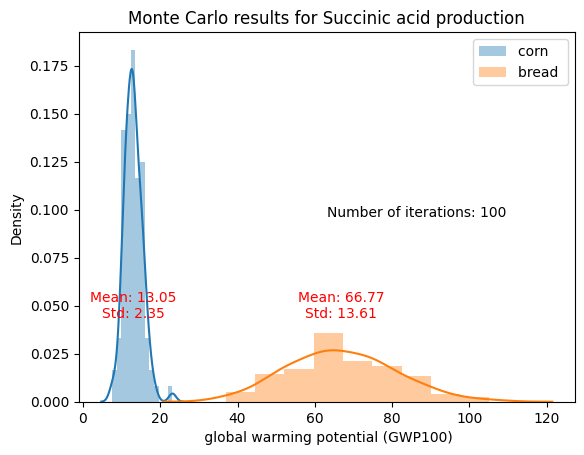

<Figure size 640x480 with 0 Axes>

In [9]:
vis.plot_MC_results()

In [10]:
# Read the CSV file into a DataFrame
def plot_MC_results():
    df = pd.read_csv('results/MC_LCA_results.csv')


    # Create a distplot of the two Series objects
    for col in df.columns:
        sns.distplot(df[col], 
        label=col.split('@')[0],)
        mean = df[col].mean()
        std = df[col].std()
        plt.text(mean, 0.05, f'Mean: {mean:.2f}\nStd: {std:.2f}', ha='center', va='top',     color='black', fontsize=8)

    # Add a legend to the plot
    plt.legend()
    plt.xlabel(col.split('@')[1])
    plt.title('Monte Carlo results for Succinic acid production')
    plt.annotate("Number of iterations: {}".format(len(df)), xy=(0.5, 0.5), xycoords='axes fraction')
    # Show the plot
    plt.show()

    # Save the plot
    plt.savefig('figures/MC_LCA_results_distplot.svg')

In [11]:
# Read the CSV file into a DataFrame
def plot_MC_results():
    df = pd.read_csv('results/MC_LCA_results.csv')


    # Create a distplot of the two Series objects
    for col in df.columns:
        sns.distplot(df[col], 
        label=col.split('@')[0],)
        mean = df[col].mean()
        std = df[col].std()
        plt.text(mean, 0.05, f'Mean: {mean:.2f}\nStd: {std:.2f}', ha='center', va='top',     color='black', fontsize=8)

    # Add a legend to the plot
    plt.legend()
    plt.xlabel(col.split('@')[1])
    plt.title('Monte Carlo results for Succinic acid production')
    plt.annotate("Number of iterations: {}".format(len(df)), xy=(0.5, 0.5), xycoords='axes fraction')
    # Show the plot
    plt.show()

    # Save the plot
    plt.savefig('figures/MC_LCA_results_distplot.svg')

In [12]:
if __name__ == "__main__":
    plot_MC_results()

NameError: name 'pd' is not defined

In [13]:
import matplotlib.pyplot as plt

In [14]:
label=col.split('@')[0],)

SyntaxError: unmatched ')' (<ipython-input-14-e2eef9b8d350>, line 1)

In [15]:
if __name__ == "__main__":

SyntaxError: incomplete input (<ipython-input-15-cfba8fb84317>, line 1)

In [16]:
__name__ == "__main__"

True

In [17]:
if __name__ == "__main__":
    plot_MC_results()

NameError: name 'pd' is not defined

In [18]:
# Read the CSV file into a DataFrame
def plot_MC_results():
    df = pd.read_csv('results/MC_LCA_results.csv')


    # Create a distplot of the two Series objects
    for col in df.columns:
        sns.distplot(df[col], 
        label=col.split('@')[0],)
        mean = df[col].mean()
        std = df[col].std()
        plt.text(mean, 0.05, f'Mean: {mean:.2f}\nStd: {std:.2f}', ha='center', va='top',     color='black', fontsize=8)

    # Add a legend to the plot
    plt.legend()
    plt.xlabel(col.split('@')[1])
    plt.title('Monte Carlo results for Succinic acid production')
    plt.annotate("Number of iterations: {}".format(len(df)), xy=(0.5, 0.5), xycoords='axes fraction')
    # Show the plot
    plt.show()

    # Save the plot
    plt.savefig('figures/MC_LCA_results_distplot.svg')

In [19]:
if __name__ == "__main__":
    plot_MC_results()

NameError: name 'pd' is not defined

In [1]:
# Read the CSV file into a DataFrame
def plot_MC_results():
    df = pd.read_csv('results/MC_LCA_results.csv')


    # Create a distplot of the two Series objects
    for col in df.columns:
        sns.distplot(df[col], 
        label=col.split('@')[0],)
        mean = df[col].mean()
        std = df[col].std()
        plt.text(mean, 0.05, f'Mean: {mean:.2f}\nStd: {std:.2f}', ha='center', va='top',     color='black', fontsize=8)

    # Add a legend to the plot
    plt.legend()
    plt.xlabel(col.split('@')[1])
    plt.title('Monte Carlo results for Succinic acid production')
    plt.annotate("Number of iterations: {}".format(len(df)), xy=(0.5, 0.5), xycoords='axes fraction')
    # Show the plot
    plt.show()

    # Save the plot
    plt.savefig('figures/MC_LCA_results_distplot.svg')

In [2]:
if __name__ == "__main__":
    plot_MC_results()

NameError: name 'pd' is not defined

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Add a legend to the plot

<ipython-input-1-95ce7ee958e4>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],
<ipython-input-1-95ce7ee958e4>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],


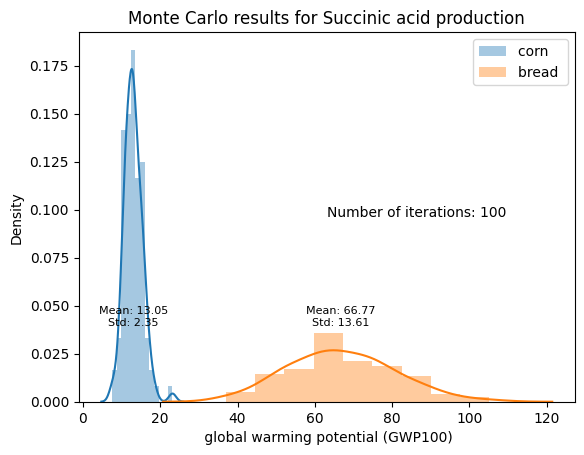

<Figure size 640x480 with 0 Axes>

In [5]:
plot_MC_results()

In [6]:
plt.savefig(f'figures/MC_LCA_results_distplot_{}.svg'.format(len(df))

SyntaxError: f-string: empty expression not allowed (<ipython-input-6-f4f40d42da49>, line 1)

In [7]:
plt.savefig('figures/MC_LCA_results_distplot_{}.svg'.format(len(df))

SyntaxError: incomplete input (<ipython-input-7-cb3cd4b9c6ea>, line 1)

In [8]:
plt.savefig('figures/MC_LCA_results_distplot_{}.svg'.format(len(df)))

NameError: name 'df' is not defined

In [9]:
vis.plot_MC_results()

NameError: name 'vis' is not defined

In [10]:
# Read the CSV file into a DataFrame
def plot_MC_results():
    df = pd.read_csv('results/MC_LCA_results.csv')


    # Create a distplot of the two Series objects
    for col in df.columns:
        sns.distplot(df[col], 
        label=col.split('@')[0],)
        mean = df[col].mean()
        std = df[col].std()
        plt.text(mean, 0.05, f'Mean: {mean:.2f}\nStd: {std:.2f}', ha='center', va='top',     color='black', fontsize=8)

    # Add a legend to the plot
    plt.legend()
    plt.xlabel(col.split('@')[1])
    plt.title('Monte Carlo results for Succinic acid production')
    plt.annotate("Number of iterations: {}".format(len(df)), xy=(0.5, 0.5), xycoords='axes fraction')
    # Show the plot
    plt.show()

    # Save the plot
    plt.savefig('figures/MC_LCA_results_distplot_{}.svg'.format(len(df)))

<ipython-input-10-248d83248b3a>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],
<ipython-input-10-248d83248b3a>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],


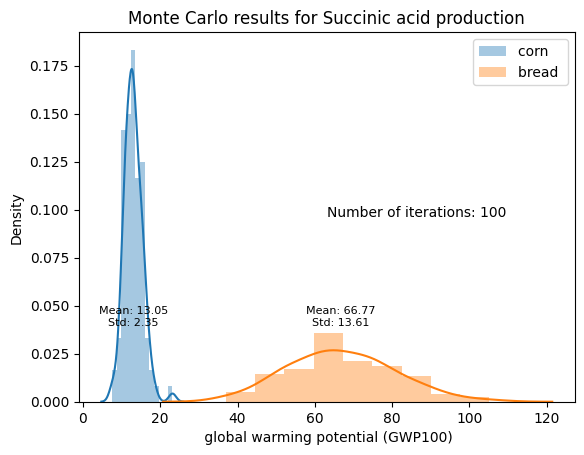

<Figure size 640x480 with 0 Axes>

In [11]:
if __name__ == "__main__":
    plot_MC_results()

In [12]:
# Read the CSV file into a DataFrame
def plot_MC_results():
    df = pd.read_csv('results/MC_LCA_results.csv')


    # Create a distplot of the two Series objects
    for col in df.columns:
        sns.distplot(df[col], 
        label=col.split('@')[0],)
        mean = df[col].mean()
        std = df[col].std()
        min = df[col].min()
        max = df[col].max()
        plt.text(mean, 0.05, f'Mean: {mean:.2f}\nStd: {std:.2f}\nMin: {min:.2f}\nMax: {max:.2f}'
                 , ha='center', va='top',     color='black', fontsize=8)

    # Add a legend to the plot
    plt.legend()
    plt.xlabel(col.split('@')[1])
    plt.title('Monte Carlo results for Succinic acid production')
    plt.annotate("Number of iterations: {}".format(len(df)), xy=(0.5, 0.5), xycoords='axes fraction')
    # Show the plot
    plt.show()

    # Save the plot
    plt.savefig('figures/MC_LCA_results_distplot_{}.svg'.format(len(df)))

In [13]:
vis.plot_MC_results()

NameError: name 'vis' is not defined

In [14]:
# Read the CSV file into a DataFrame
def plot_MC_results():
    df = pd.read_csv('results/MC_LCA_results.csv')


    # Create a distplot of the two Series objects
    for col in df.columns:
        sns.distplot(df[col], 
        label=col.split('@')[0],)
        mean = df[col].mean()
        std = df[col].std()
        min = df[col].min()
        max = df[col].max()
        plt.text(mean, 0.05, f'Mean: {mean:.2f}\nStd: {std:.2f}\nMin: {min:.2f}\nMax: {max:.2f}'
                 , ha='center', va='top',     color='black', fontsize=8)

    # Add a legend to the plot
    plt.legend()
    plt.xlabel(col.split('@')[1])
    plt.title('Monte Carlo results for Succinic acid production')
    plt.annotate("Number of iterations: {}".format(len(df)), xy=(0.5, 0.5), xycoords='axes fraction')
    # Show the plot
    plt.show()

    # Save the plot
    plt.savefig('figures/MC_LCA_results_distplot_{}.svg'.format(len(df)))

<ipython-input-14-19551081a77c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],
<ipython-input-14-19551081a77c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],


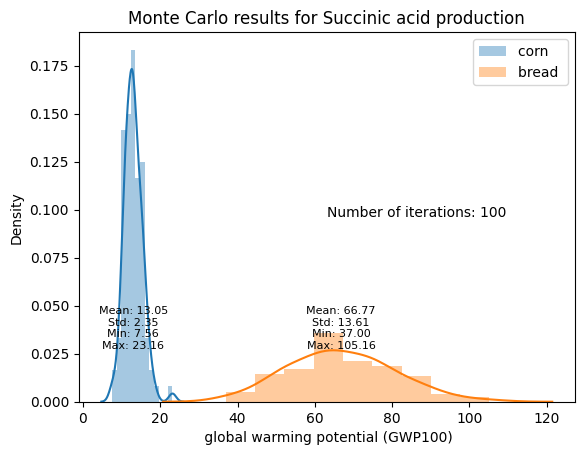

<Figure size 640x480 with 0 Axes>

In [15]:
if __name__ == "__main__":
    plot_MC_results()

In [16]:
# Read the CSV file into a DataFrame
def plot_MC_results():
    df = pd.read_csv('results/MC_LCA_results.csv')


    # Create a distplot of the two Series objects
    for col in df.columns:
        sns.distplot(df[col], 
        label=col.split('@')[0],)
        mean = df[col].mean()
        std = df[col].std()
        min = df[col].min()
        max = df[col].max()
        plt.text(mean, 0.05, f'Mean: {mean:.2f}\nStd: {std:.2f}\nMin: {min:.2f}\nMax: {max:.2f}'
                 , ha='center', va='top',     color='black', fontsize=8)

    # Add a legend to the plot
    plt.legend()
    plt.xlabel(col.split('@')[1])
    plt.title('Monte Carlo results for Succinic acid production')
    plt.annotate("Number of iterations: {}".format(len(df)), xy=(0.5, 1), xycoords='axes fraction')
    # Show the plot
    plt.show()

    # Save the plot
    plt.savefig('figures/MC_LCA_results_distplot_{}.svg'.format(len(df)))

<ipython-input-16-bfbc9f7f4afc>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],
<ipython-input-16-bfbc9f7f4afc>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],


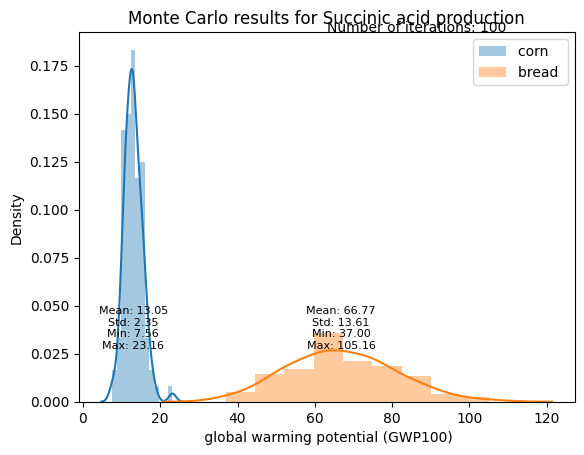

<Figure size 640x480 with 0 Axes>

In [17]:
if __name__ == "__main__":
    plot_MC_results()

In [18]:
# Read the CSV file into a DataFrame
def plot_MC_results():
    df = pd.read_csv('results/MC_LCA_results.csv')


    # Create a distplot of the two Series objects
    for col in df.columns:
        sns.distplot(df[col], 
        label=col.split('@')[0],)
        mean = df[col].mean()
        std = df[col].std()
        min = df[col].min()
        max = df[col].max()
        plt.text(mean, 0.05, f'Mean: {mean:.2f}\nStd: {std:.2f}\nMin: {min:.2f}\nMax: {max:.2f}'
                 , ha='center', va='top',     color='black', fontsize=8)

    # Add a legend to the plot
    plt.legend()
    plt.xlabel(col.split('@')[1])
    plt.title('Monte Carlo results for Succinic acid production')
    plt.annotate("Number of iterations: {}".format(len(df)), xy=(0.3, 0.8), xycoords='axes fraction')
    # Show the plot
    plt.show()

    # Save the plot
    plt.savefig('figures/MC_LCA_results_distplot_{}.svg'.format(len(df)))

<ipython-input-18-68b79f019b99>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],
<ipython-input-18-68b79f019b99>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],


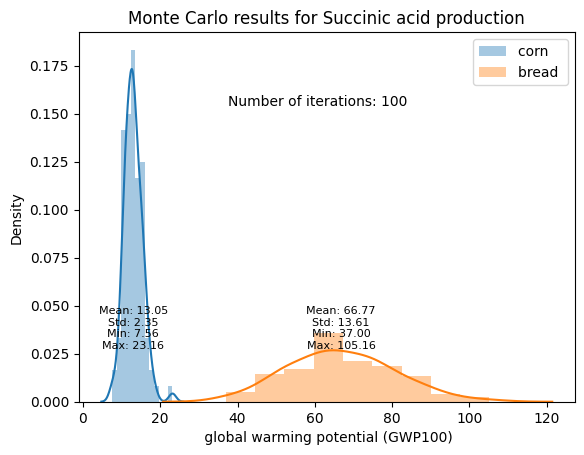

<Figure size 640x480 with 0 Axes>

In [19]:
if __name__ == "__main__":
    plot_MC_results()

In [20]:
# Read the CSV file into a DataFrame
def plot_MC_results():
    df = pd.read_csv('results/MC_LCA_results.csv')


    # Create a distplot of the two Series objects
    for col in df.columns:
        sns.distplot(df[col], 
        label=col.split('@')[0],)
        mean = df[col].mean()
        std = df[col].std()
        min = df[col].min()
        max = df[col].max()
        plt.text(mean, 0.05, f'Mean: {mean:.2f}\nStd: {std:.2f}\nMin: {min:.2f}\nMax: {max:.2f}'
                 , ha='center', va='top',     color='black', fontsize=8)

    # Add a legend to the plot
    plt.legend()
    plt.xlabel(col.split('@')[1])
    plt.title('Monte Carlo results for Succinic acid production')
    plt.annotate("Number of iterations: {}".format(len(df)), xy=(0.3, 0.9), xycoords='axes fraction')
    # Show the plot
    plt.show()

    # Save the plot
    plt.savefig('figures/MC_LCA_results_distplot_{}.svg'.format(len(df)))

In [21]:
# Read the CSV file into a DataFrame
def plot_MC_results():
    df = pd.read_csv('results/MC_LCA_results.csv')


    # Create a distplot of the two Series objects
    for col in df.columns:
        sns.distplot(df[col], 
        label=col.split('@')[0],)
        mean = df[col].mean()
        std = df[col].std()
        min = df[col].min()
        max = df[col].max()
        plt.text(mean, 0.05, f'Mean: {mean:.2f}\nStd: {std:.2f}\nMin: {min:.2f}\nMax: {max:.2f}'
                 , ha='center', va='top',     color='black', fontsize=8)

    # Add a legend to the plot
    plt.legend()
    plt.xlabel(col.split('@')[1])
    plt.title('Monte Carlo results for Succinic acid production')
    plt.annotate("Number of iterations: {}".format(len(df)), xy=(0.3, 0.9), xycoords='axes fraction')
    # Show the plot
    plt.show()

    # Save the plot
    plt.savefig('figures/MC_LCA_results_distplot_{}.svg'.format(len(df)))

<ipython-input-21-59b01d4ae853>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],
<ipython-input-21-59b01d4ae853>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],


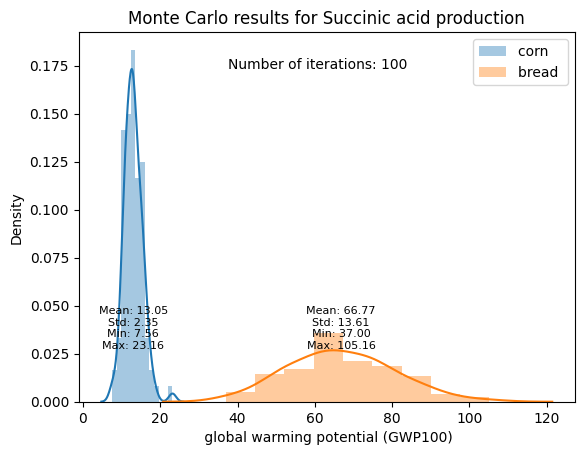

<Figure size 640x480 with 0 Axes>

In [22]:
if __name__ == "__main__":
    plot_MC_results()

In [23]:
for model in models:
    get_LCA_scores(model)
    get_MCLCA_scores(model, iterations=10000)
    # make_process_diagram(model)

NameError: name 'models' is not defined

In [24]:
from import_db_from_file import write_database
from add_uncertainties import add_uncertainties
from LCA_calculations import get_LCA_scores, get_MCLCA_scores
import visualisation as vis
#from make_process_diagram import make_process_diagram

import bw2data as bd
import bw2io as bi
import bw2calc as bc
import os
import shutil

In [25]:
bd.projects.set_current('cLCA-aalborg')

remove = True
if remove == True and os.path.exists('results'):
    shutil.rmtree('results')


models = ["corn"] 
models += ['bread']

for model in models:
    write_database(model)
    add_uncertainties(model)

bd.databases


 Writing database for: corn

Deleted old database fg_corn

****** Writing new database: fg_corn
Not able to determine geocollections for all datasets. This database is not ready for regionalization.
Title: Writing activities to SQLite3 database:
  Started: 05/18/2023 23:34:11
  Finished: 05/18/2023 23:34:11
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.38
{'depends': ['biosphere3', 'con391'], 'backend': 'sqlite', 'number': 8, 'modified': '2023-05-18T23:34:11.118336', 'geocollections': [], 'searchable': True, 'processed': '2023-05-18T23:34:11.161730', 'dirty': False}

 Writing database for: bread

Deleted old database fg_bread

****** Writing new database: fg_bread
Not able to determine geocollections for all datasets. This database is not ready for regionalization.
Title: Writing activities to SQLite3 database:
  Started: 05/18/2023 23:34:11
  Finished: 05/18/2023 23:34:11
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.38
{'depends': ['biosphere3', 'con391'], 

Databases dictionary with 4 object(s):
	biosphere3
	con391
	fg_bread
	fg_corn

In [26]:
for model in models:
    get_LCA_scores(model)
    get_MCLCA_scores(model, iterations=10000)
    # make_process_diagram(model)


***************** LCA calculations *****************

The functional unit is: 
Succinic acid production (corn), with an amount of 1 kg

*****
The exchanges of the functional unit are: 

Exchange: 1.0 kg 'Succinic acid production (corn)' (kg, None, None) to 'Succinic acid production (corn)' (kg, None, None)>
Exchange: -2.72 kilogram 'market for ammonium sulfate' (kilogram, RER, None) to 'Succinic acid production (corn)' (kg, None, None)>
Exchange: 1.66 kg 'Sorghum grains' (kg, None, None) to 'Succinic acid production (corn)' (kg, None, None)>
Exchange: 0.013 kg 'Dextrose' (kg, None, None) to 'Succinic acid production (corn)' (kg, None, None)>
Exchange: 1.29 kg 'process water' (kg, None, None) to 'Succinic acid production (corn)' (kg, None, None)>
Exchange: 25.3 m3 'Ultrapure water' (m3, None, None) to 'Succinic acid production (corn)' (kg, None, None)>
Exchange: 2.67 kWh 'Electricity' (kWh, None, None) to 'Succinic acid production (corn)' (kg, None, None)>
Exchange: 14.77 mj 'Natural g

In [ ]:
vis.plot_MC_results()